In [1]:
import pandas as pd
import numpy as np
with open("nba_2013.csv", 'r') as csvfile:
    nba = pd.read_csv(csvfile)

In [2]:
nba.head()

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,...,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,...,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,...,204,306,38,24,36,39,108,362,2013-2014,2013
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,...,230,262,248,35,3,146,136,1330,2013-2014,2013
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,...,183,277,40,23,46,63,187,328,2013-2014,2013


In [3]:
nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 31 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   player        481 non-null    object 
 1   pos           481 non-null    object 
 2   age           481 non-null    int64  
 3   bref_team_id  481 non-null    object 
 4   g             481 non-null    int64  
 5   gs            481 non-null    int64  
 6   mp            481 non-null    int64  
 7   fg            481 non-null    int64  
 8   fga           481 non-null    int64  
 9   fg.           479 non-null    float64
 10  x3p           481 non-null    int64  
 11  x3pa          481 non-null    int64  
 12  x3p.          414 non-null    float64
 13  x2p           481 non-null    int64  
 14  x2pa          481 non-null    int64  
 15  x2p.          478 non-null    float64
 16  efg.          479 non-null    float64
 17  ft            481 non-null    int64  
 18  fta           481 non-null    

In [4]:
## drop useless col , 
data = nba.drop(columns=['player','season','season_end'])
data

,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,x3p,...,ft.,orb,drb,trb,ast,stl,blk,tov,pf,pts
0,SF,23,TOT,63,0,847,66,141,0.468,4,...,0.660,72,144,216,28,23,26,30,122,171
1,C,20,OKC,81,20,1197,93,185,0.503,0,...,0.581,142,190,332,43,40,57,71,203,265
2,PF,27,TOT,53,12,961,143,275,0.520,0,...,0.639,102,204,306,38,24,36,39,108,362
3,SG,28,ORL,73,73,2552,464,1011,0.459,128,...,0.815,32,230,262,248,35,3,146,136,1330
4,C,25,NOP,56,30,951,136,249,0.546,0,...,0.836,94,183,277,40,23,46,63,187,328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,SG,20,PHI,72,16,1765,345,808,0.427,40,...,0.641,69,159,228,217,78,16,204,151,939
477,SG,28,LAL,64,9,1810,387,889,0.435,135,...,0.825,29,137,166,95,46,12,95,156,1144
478,PF,25,PHI,79,78,2718,582,1283,0.454,90,...,0.712,166,310,476,182,167,36,165,213,1417
479,C,21,CHA,82,3,1416,172,404,0.426,0,...,0.730,118,235,353,92,40,41,87,170,490


In [5]:
## handling categorical variable
encodedDf = pd.get_dummies(data[['pos','bref_team_id']],drop_first=True)
data = pd.concat([encodedDf,data.drop(columns=['bref_team_id','pos'])],axis=1)
data

,pos_F,pos_G,pos_PF,pos_PG,pos_SF,pos_SG,bref_team_id_BOS,bref_team_id_BRK,bref_team_id_CHA,bref_team_id_CHI,...,ft.,orb,drb,trb,ast,stl,blk,tov,pf,pts
0,0,0,0,0,1,0,0,0,0,0,...,0.660,72,144,216,28,23,26,30,122,171
1,0,0,0,0,0,0,0,0,0,0,...,0.581,142,190,332,43,40,57,71,203,265
2,0,0,1,0,0,0,0,0,0,0,...,0.639,102,204,306,38,24,36,39,108,362
3,0,0,0,0,0,1,0,0,0,0,...,0.815,32,230,262,248,35,3,146,136,1330
4,0,0,0,0,0,0,0,0,0,0,...,0.836,94,183,277,40,23,46,63,187,328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,0,0,0,0,0,1,0,0,0,0,...,0.641,69,159,228,217,78,16,204,151,939
477,0,0,0,0,0,1,0,0,0,0,...,0.825,29,137,166,95,46,12,95,156,1144
478,0,0,1,0,0,0,0,0,0,0,...,0.712,166,310,476,182,167,36,165,213,1417
479,0,0,0,0,0,0,0,0,1,0,...,0.730,118,235,353,92,40,41,87,170,490


In [6]:
## handling missing value 
missingValLst = data.isnull().sum()[data.isnull().sum()>0]
missingValLst.index

Index(['fg.', 'x3p.', 'x2p.', 'efg.', 'ft.'], dtype='object')

In [7]:
data[missingValLst.index].describe()

,fg.,x3p.,x2p.,efg.,ft.
count,479.000000,414.000000,478.000000,479.000000,461.000000
mean,0.436436,0.285111,0.466947,0.480752,0.722419
std,0.098672,0.157633,0.104448,0.099552,0.160166
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400500,0.234355,0.434719,0.451000,0.654000
50%,0.438000,0.330976,0.474475,0.488000,0.751000
75%,0.479500,0.375000,0.513729,0.526000,0.821000
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
## replace the missing value by its median
data = data.replace(np.nan,data[missingValLst.index].median().to_dict())

In [9]:
data[missingValLst.index].describe()

,fg.,x3p.,x2p.,efg.,ft.
count,481.000000,481.000000,481.000000,481.000000,481.000000
mean,0.436443,0.291500,0.466994,0.480782,0.723607
std,0.098467,0.147080,0.104122,0.099346,0.156898
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.401000,0.262626,0.434783,0.451000,0.657000
50%,0.438000,0.330976,0.474475,0.488000,0.751000
75%,0.479000,0.366460,0.513120,0.525000,0.816000
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
data 

,pos_F,pos_G,pos_PF,pos_PG,pos_SF,pos_SG,bref_team_id_BOS,bref_team_id_BRK,bref_team_id_CHA,bref_team_id_CHI,...,ft.,orb,drb,trb,ast,stl,blk,tov,pf,pts
0,0,0,0,0,1,0,0,0,0,0,...,0.660,72,144,216,28,23,26,30,122,171
1,0,0,0,0,0,0,0,0,0,0,...,0.581,142,190,332,43,40,57,71,203,265
2,0,0,1,0,0,0,0,0,0,0,...,0.639,102,204,306,38,24,36,39,108,362
3,0,0,0,0,0,1,0,0,0,0,...,0.815,32,230,262,248,35,3,146,136,1330
4,0,0,0,0,0,0,0,0,0,0,...,0.836,94,183,277,40,23,46,63,187,328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,0,0,0,0,0,1,0,0,0,0,...,0.641,69,159,228,217,78,16,204,151,939
477,0,0,0,0,0,1,0,0,0,0,...,0.825,29,137,166,95,46,12,95,156,1144
478,0,0,1,0,0,0,0,0,0,0,...,0.712,166,310,476,182,167,36,165,213,1417
479,0,0,0,0,0,0,0,0,1,0,...,0.730,118,235,353,92,40,41,87,170,490


In [11]:
## X and y split 
X = data.drop(columns='pts')
y = data['pts']

In [12]:
## data scaling 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaledX = scaler.fit_transform(X)

In [13]:
scaledX.shape

(481, 61)

In [14]:
## using pca to do feature selection 
from sklearn.decomposition import PCA
pca = PCA()
allPrincipalComponents = pca.fit_transform(scaledX)

Text(0.5, 1.0, 'Explained Variance')

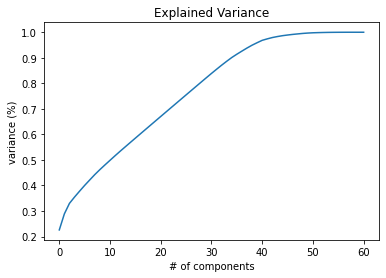

In [15]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('# of components')
plt.ylabel('variance (%)')
plt.title('Explained Variance')

In [16]:
for id1,sumVar in enumerate(np.cumsum(pca.explained_variance_ratio_)):
    if sumVar>0.95:
        print(f'# of components having 95% explained varianece: {id1}')
        break

# of components having 95% explained varianece: 39


In [17]:
## build new pca model
pca = PCA(n_components=39)
newPrincipalComponentsData = pca.fit_transform(scaledX)

In [18]:
# split the data 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(newPrincipalComponentsData,y, test_size= 0.25,random_state=122)

In [19]:
## model building 
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(X_train,y_train)

KNeighborsRegressor()

In [20]:
## train score -- r-squre
knn.score(X_train,y_train)

0.8685645353899725

In [21]:
## test score 
knn.score(X_test,y_test)

0.8458148583751747

In [22]:
## hyperparameter tunning 
from sklearn.model_selection import GridSearchCV
grid_param = {
    'weights':["uniform", "distance"],
    'n_neighbors' : [3,5,7,9,10,11,12,13],
    'leaf_size' : [18,20,25,27,30,32,34],
    'algorithm' : ['ball_tree', 'kd_tree', 'brute']
}
gridSearch = GridSearchCV(KNeighborsRegressor(),grid_param,verbose=3)

In [23]:
gridSearch.fit(X_train,y_train)

Fitting 5 folds for each of 336 candidates, totalling 1680 fits
[CV 1/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=3, weights=uniform;, score=0.783 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=3, weights=uniform;, score=0.726 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=3, weights=uniform;, score=0.761 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=3, weights=uniform;, score=0.765 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=3, weights=uniform;, score=0.738 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=3, weights=distance;, score=0.792 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=3, weights=distance;, score=0.743 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=3, weights=distance;, score=0.790 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, lea

[CV 2/5] END algorithm=ball_tree, leaf_size=20, n_neighbors=5, weights=uniform;, score=0.744 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=20, n_neighbors=5, weights=uniform;, score=0.751 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=20, n_neighbors=5, weights=uniform;, score=0.796 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=20, n_neighbors=5, weights=uniform;, score=0.748 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=20, n_neighbors=5, weights=distance;, score=0.812 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=20, n_neighbors=5, weights=distance;, score=0.761 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=20, n_neighbors=5, weights=distance;, score=0.790 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=20, n_neighbors=5, weights=distance;, score=0.810 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=20, n_neighbors=5, weights=distance;, score=0.764 total 

[CV 1/5] END algorithm=ball_tree, leaf_size=25, n_neighbors=7, weights=distance;, score=0.827 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=25, n_neighbors=7, weights=distance;, score=0.787 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=25, n_neighbors=7, weights=distance;, score=0.794 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=25, n_neighbors=7, weights=distance;, score=0.818 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=25, n_neighbors=7, weights=distance;, score=0.788 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=25, n_neighbors=9, weights=uniform;, score=0.821 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=25, n_neighbors=9, weights=uniform;, score=0.813 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=25, n_neighbors=9, weights=uniform;, score=0.777 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=25, n_neighbors=9, weights=uniform;, score=0.823 total 

[CV 1/5] END algorithm=ball_tree, leaf_size=27, n_neighbors=9, weights=distance;, score=0.835 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=27, n_neighbors=9, weights=distance;, score=0.816 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=27, n_neighbors=9, weights=distance;, score=0.803 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=27, n_neighbors=9, weights=distance;, score=0.833 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=27, n_neighbors=9, weights=distance;, score=0.787 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=27, n_neighbors=10, weights=uniform;, score=0.825 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=27, n_neighbors=10, weights=uniform;, score=0.827 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=27, n_neighbors=10, weights=uniform;, score=0.786 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=27, n_neighbors=10, weights=uniform;, score=0.823 to

[CV 3/5] END algorithm=ball_tree, leaf_size=30, n_neighbors=12, weights=uniform;, score=0.806 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=30, n_neighbors=12, weights=uniform;, score=0.830 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=30, n_neighbors=12, weights=uniform;, score=0.819 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=30, n_neighbors=12, weights=distance;, score=0.848 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=30, n_neighbors=12, weights=distance;, score=0.839 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=30, n_neighbors=12, weights=distance;, score=0.821 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=30, n_neighbors=12, weights=distance;, score=0.836 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=30, n_neighbors=12, weights=distance;, score=0.820 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=30, n_neighbors=13, weights=uniform;, score=0.8

[CV 1/5] END algorithm=ball_tree, leaf_size=34, n_neighbors=3, weights=uniform;, score=0.783 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=34, n_neighbors=3, weights=uniform;, score=0.726 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=34, n_neighbors=3, weights=uniform;, score=0.761 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=34, n_neighbors=3, weights=uniform;, score=0.765 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=34, n_neighbors=3, weights=uniform;, score=0.738 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=34, n_neighbors=3, weights=distance;, score=0.792 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=34, n_neighbors=3, weights=distance;, score=0.743 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=34, n_neighbors=3, weights=distance;, score=0.790 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=34, n_neighbors=3, weights=distance;, score=0.772 total t

[CV 3/5] END algorithm=kd_tree, leaf_size=18, n_neighbors=7, weights=distance;, score=0.794 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=18, n_neighbors=7, weights=distance;, score=0.818 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=18, n_neighbors=7, weights=distance;, score=0.788 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=18, n_neighbors=9, weights=uniform;, score=0.821 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=18, n_neighbors=9, weights=uniform;, score=0.813 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=18, n_neighbors=9, weights=uniform;, score=0.777 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=18, n_neighbors=9, weights=uniform;, score=0.823 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=18, n_neighbors=9, weights=uniform;, score=0.777 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=18, n_neighbors=9, weights=distance;, score=0.835 total time=   0.0s
[CV 2/

[CV 1/5] END algorithm=kd_tree, leaf_size=20, n_neighbors=9, weights=distance;, score=0.835 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=20, n_neighbors=9, weights=distance;, score=0.816 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=20, n_neighbors=9, weights=distance;, score=0.803 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=20, n_neighbors=9, weights=distance;, score=0.833 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=20, n_neighbors=9, weights=distance;, score=0.787 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=20, n_neighbors=10, weights=uniform;, score=0.825 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=20, n_neighbors=10, weights=uniform;, score=0.827 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=20, n_neighbors=10, weights=uniform;, score=0.786 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=20, n_neighbors=10, weights=uniform;, score=0.823 total time=   0.0s
[

[CV 3/5] END algorithm=kd_tree, leaf_size=25, n_neighbors=10, weights=uniform;, score=0.786 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=25, n_neighbors=10, weights=uniform;, score=0.823 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=25, n_neighbors=10, weights=uniform;, score=0.801 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=25, n_neighbors=10, weights=distance;, score=0.838 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=25, n_neighbors=10, weights=distance;, score=0.829 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=25, n_neighbors=10, weights=distance;, score=0.808 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=25, n_neighbors=10, weights=distance;, score=0.832 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=25, n_neighbors=10, weights=distance;, score=0.805 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=25, n_neighbors=11, weights=uniform;, score=0.832 total time=   0

[CV 3/5] END algorithm=kd_tree, leaf_size=27, n_neighbors=11, weights=uniform;, score=0.801 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=27, n_neighbors=11, weights=uniform;, score=0.819 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=27, n_neighbors=11, weights=uniform;, score=0.808 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=27, n_neighbors=11, weights=distance;, score=0.843 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=27, n_neighbors=11, weights=distance;, score=0.837 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=27, n_neighbors=11, weights=distance;, score=0.818 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=27, n_neighbors=11, weights=distance;, score=0.828 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=27, n_neighbors=11, weights=distance;, score=0.810 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=27, n_neighbors=12, weights=uniform;, score=0.839 total time=   0

[CV 1/5] END algorithm=kd_tree, leaf_size=30, n_neighbors=11, weights=uniform;, score=0.832 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=30, n_neighbors=11, weights=uniform;, score=0.835 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=30, n_neighbors=11, weights=uniform;, score=0.801 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=30, n_neighbors=11, weights=uniform;, score=0.819 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=30, n_neighbors=11, weights=uniform;, score=0.808 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=30, n_neighbors=11, weights=distance;, score=0.843 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=30, n_neighbors=11, weights=distance;, score=0.837 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=30, n_neighbors=11, weights=distance;, score=0.818 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=30, n_neighbors=11, weights=distance;, score=0.828 total time=   0.

[CV 2/5] END algorithm=kd_tree, leaf_size=34, n_neighbors=3, weights=distance;, score=0.743 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=34, n_neighbors=3, weights=distance;, score=0.790 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=34, n_neighbors=3, weights=distance;, score=0.772 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=34, n_neighbors=3, weights=distance;, score=0.752 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=34, n_neighbors=5, weights=uniform;, score=0.802 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=34, n_neighbors=5, weights=uniform;, score=0.744 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=34, n_neighbors=5, weights=uniform;, score=0.751 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=34, n_neighbors=5, weights=uniform;, score=0.796 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=34, n_neighbors=5, weights=uniform;, score=0.748 total time=   0.0s
[CV 1/

[CV 1/5] END algorithm=brute, leaf_size=18, n_neighbors=7, weights=distance;, score=0.827 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=18, n_neighbors=7, weights=distance;, score=0.787 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=18, n_neighbors=7, weights=distance;, score=0.794 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=18, n_neighbors=7, weights=distance;, score=0.818 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=18, n_neighbors=7, weights=distance;, score=0.788 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=18, n_neighbors=9, weights=uniform;, score=0.821 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=18, n_neighbors=9, weights=uniform;, score=0.813 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=18, n_neighbors=9, weights=uniform;, score=0.777 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=18, n_neighbors=9, weights=uniform;, score=0.823 total time=   0.0s
[CV 5/5] END algorithm=

[CV 2/5] END algorithm=brute, leaf_size=25, n_neighbors=3, weights=uniform;, score=0.726 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=25, n_neighbors=3, weights=uniform;, score=0.761 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=25, n_neighbors=3, weights=uniform;, score=0.765 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=25, n_neighbors=3, weights=uniform;, score=0.738 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=25, n_neighbors=3, weights=distance;, score=0.792 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=25, n_neighbors=3, weights=distance;, score=0.743 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=25, n_neighbors=3, weights=distance;, score=0.790 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=25, n_neighbors=3, weights=distance;, score=0.772 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=25, n_neighbors=3, weights=distance;, score=0.752 total time=   0.0s
[CV 1/5] END algorithm=

[CV 4/5] END algorithm=brute, leaf_size=27, n_neighbors=11, weights=distance;, score=0.828 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=27, n_neighbors=11, weights=distance;, score=0.810 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=27, n_neighbors=12, weights=uniform;, score=0.839 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=27, n_neighbors=12, weights=uniform;, score=0.837 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=27, n_neighbors=12, weights=uniform;, score=0.806 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=27, n_neighbors=12, weights=uniform;, score=0.830 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=27, n_neighbors=12, weights=uniform;, score=0.819 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=27, n_neighbors=12, weights=distance;, score=0.848 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=27, n_neighbors=12, weights=distance;, score=0.839 total time=   0.0s
[CV 3/5] END al

[CV 4/5] END algorithm=brute, leaf_size=32, n_neighbors=9, weights=distance;, score=0.833 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=32, n_neighbors=9, weights=distance;, score=0.787 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=32, n_neighbors=10, weights=uniform;, score=0.825 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=32, n_neighbors=10, weights=uniform;, score=0.827 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=32, n_neighbors=10, weights=uniform;, score=0.786 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=32, n_neighbors=10, weights=uniform;, score=0.823 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=32, n_neighbors=10, weights=uniform;, score=0.801 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=32, n_neighbors=10, weights=distance;, score=0.838 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=32, n_neighbors=10, weights=distance;, score=0.829 total time=   0.0s
[CV 3/5] END algo

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [18, 20, 25, 27, 30, 32, 34],
                         'n_neighbors': [3, 5, 7, 9, 10, 11, 12, 13],
                         'weights': ['uniform', 'distance']},
             verbose=3)

In [24]:
gridSearch.best_params_

{'algorithm': 'ball_tree',
 'leaf_size': 18,
 'n_neighbors': 12,
 'weights': 'distance'}

In [25]:
## new model 
knn = KNeighborsRegressor(**gridSearch.best_params_)
knn.fit(X_train,y_train)
## train score -- r-squre
print(knn.score(X_train,y_train))
print(knn.score(X_test,y_test))

1.0
0.8465806504275496


In [26]:
## model evaluation
from sklearn.model_selection import cross_val_score
res = cross_val_score(KNeighborsRegressor(**gridSearch.best_params_),newPrincipalComponentsData,y,scoring='r2',cv= 5)
print(f"result: {res}")
print(f'avg_result: {res.mean()}')

result: [0.82369243 0.78830467 0.81178901 0.81251908 0.81905055]
avg_result: 0.8110711473774186


In [27]:
res = cross_val_score(KNeighborsRegressor(),newPrincipalComponentsData,y,scoring='r2',cv= 5)
print(f"result: {res}")
print(f'avg_result: {res.mean()}')

result: [0.81293937 0.76862553 0.73004343 0.79675545 0.76760981]
avg_result: 0.7751947180955888
